**ESERCIZITAZIONE 7:**

Analisi dell'autocorrelazione e costruzione della funzione g(r) per una simulazione di dinamica molecolare, in un ensemble canonico.

    

**Esercizio 7.1-7.2:** Si calcola l'evoluzione dell'energia interna $U/N$, riportando i valori istantanei di ogni step. Nello specifico, tale campionamento è equivalente a impostare la dimensione del blocco pari a 1, ignorando le media globali. Dopo aver ottenuto i dati dell'energia istantanea per $M = 5 * 10^5$ step, se ne effettua l'autocorrelazione, al fine di poter valutare quando devono essere grandi i blocchi per eliminare la correlazione al loro interno. 

L'obiettivo del calcolo dell'autocorrelazione è identificare il tempo necessario al sistema per passare da uno stato termodinamico a uno differente. Ogni media d'insieme (la media di blocco identificata con la notazione $< >$) deve essere valutata su un numero di punti sullo spazio delle fasi sufficiente a esplorare ergodicamente la configurazione di equilibrio, su cui le grandezze termodinamiche si mantengono stazionarie. 

E' quindi opportuno valutare l'autocorrelazione soltanto dopo aver equilibrato il sistema, in modo da evitare di inserire nel calcolo effetti dovuti a fluttuazioni che non riguardano la dinamica di equilibrio. Quindi, si imposta la media a blocchi scegliendo come dimensione del blocco un numero di step sufficientemente grande rispetto al tempo di autocorrelazione.

L'autocorrelazione $\chi$ con lag $\tau$ di una variabile $x(t)$ è data dalla segente formula:

$$\chi(\tau) = \frac{<x(t) - \mu> \ <x(t + \tau) - \mu>}{\sigma^2}$$
$$\mu = <x(t)> \ , \ \sigma^2 = <x(t)^2> - <x(t)>^2 $$

Si utilizza un lag $\tau$ che va da 0 fino a un lag ragionevolmente grande su cui si può calcolare l'autocorrelazione (la variabile $x(t)$ non è infatti una funzione definita su $(-\inf, +\inf)$ ma è un vettore di $\approx 500000$ elementi).

Si parte dallo stato liquido, con $T = 1.1, \rho = 0.8, r_{cut} = 2.2$. La prima valutazione riguarda il tempo di equilibrazione:

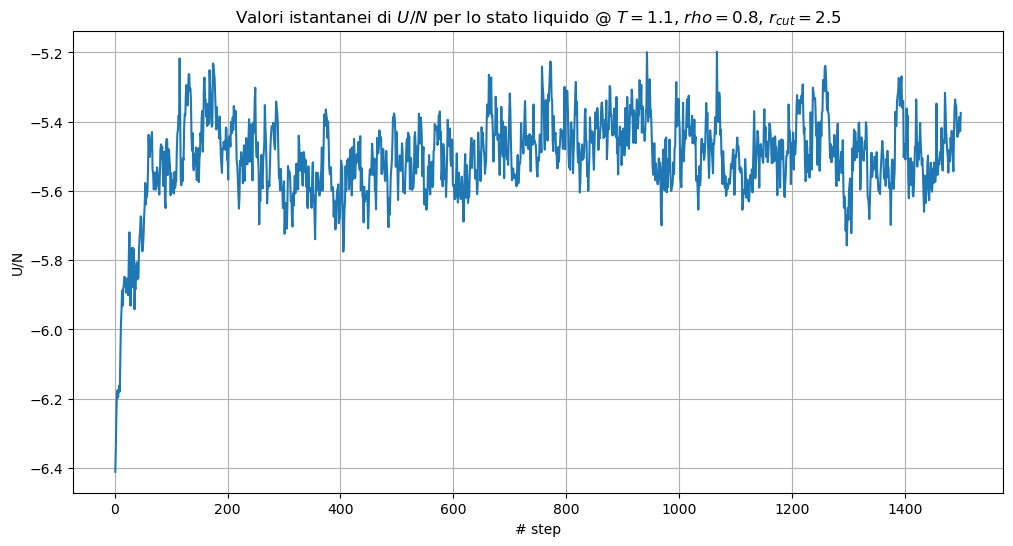

In [1]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_LIQUID_EQUILIBRATION/OUTPUT/potential_energy.txt"
PEN = pd.read_table(filename, delimiter = "\t" , usecols=(1,2) , names = ('Step', 'PE_Instant'),header = 0 )
PEN['PE_Instant'] = pd.to_numeric(PEN['PE_Instant'] , errors = 'coerce')
PEN['Step'] = pd.to_numeric(PEN['Step'] , errors = 'coerce')
Step_vector = PEN['PE_Instant']
PE_Current_vector = PEN['PE_Instant']

plt.figure(figsize = (12,6))
plt.plot(PE_Current_vector[1:1500])
plt.title('Valori istantanei di $U/N$ per lo stato liquido @ $T = 1.1$, $rho = 0.8$, $r_{cut} = 2.5$')
plt.xlabel('# step')
plt.ylabel('U/N')
plt.grid(True)

Stimando una equilibrazione della durata di 100 step, si procede a calcolare l'autocorrelazione

In [2]:
## STATO LIQUIDO: T = 1.1 rho = 0.8, rcut = 2.5
#Equilibrazione dopo 100 step

#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lettura file
filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_LIQUID/OUTPUT/potential_energy.txt"
LIQUID = pd.read_table(filename, delimiter = "\t" , usecols=(1,2) , names = ('#','Actual') , header = 0)

#estrarre i dati dalle colonne del file di testo
LIQUID['Actual'] = pd.to_numeric(LIQUID['Actual'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
energy_vector = LIQUID['Actual']

def autocorrelation(vec , tau):
    #vec: inserire il vettore di cui si calcola l'autocorrelazione X(tau)
    #tau: inserire l'intervallo temporale tau su cui si calcola l'autocorrelazione
    
    leng = len(vec)
    mean = np.mean(vec)
    m_corr = np.sum((vec[0:leng - tau] - mean) * (vec[tau:leng] - mean))
    m_var = np.sum((vec - mean) **2)
    
    return m_corr/m_var

def autocorrelat(vec,tau):
    tmax = len(vec)
    corr1 = 0
    corr2 = 0
    corr3 = 0
    var1 = 0
    var2 = 0
    for i in range(0, tmax - tau):
        corr1 = corr1 + vec[i]*vec[i+tau]
        corr2= corr2 + vec[i]
        corr3 = corr3 + vec[i + tau]
        
    for i in range(0, tmax):
        var1 = var1 + vec[i]**2
        var2 = var2 + vec[i]
        
    return (corr1/(tmax - tau) - corr2*corr3/( (tmax - tau)**2) ) / (var1/tmax - (var2/tmax)**2)

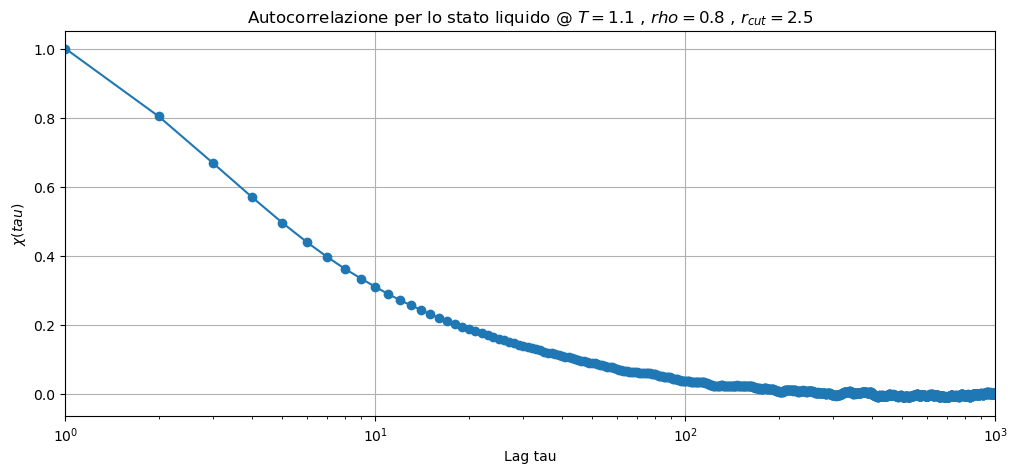

In [3]:
def autocorrelation_function(x):
    n = len(x)
    mean = np.mean(x)
    autocorr = np.correlate(x - mean, x - mean, mode='full') / (np.var(x) * n)
    return autocorr[n-1:]

# Calcolo dell'autocorrelazione in funzione del lag
autocorr = autocorrelation_function(energy_vector)

#traslazione del vettore per la rappresentazione in scala logaritmica
def translate(vec):
    new_autocorr = np.zeros(len(autocorr) + 1)
    for i in range(0, len(energy_vector)):
        new_autocorr[i+1] = autocorr[i]
    return new_autocorr

autocorr = translate(autocorr)

# Creazione dell'array dei lags
lags = np.arange(len(energy_vector))

# Tracciamento dell'autocorrelazione in funzione del lag
plt.figure(figsize = (12,5))
plt.semilogx(np.arange(len(autocorr)), autocorr, marker='o', linestyle='-')
plt.xlabel('Lag tau')
plt.ylabel('$\chi(tau)$')
plt.title('Autocorrelazione per lo stato liquido @ $T = 1.1$ , $rho = 0.8$ , $r_{cut} = 2.5$')
plt.xlim(1,1000)
plt.grid(True)
plt.show()

Si studia lo stato solido con $T = 0.8$, $rho = 1.1$ e $r_{cut} = 2.2$. Si individua, come nel caso precedente, il tempo di equilibrazione:

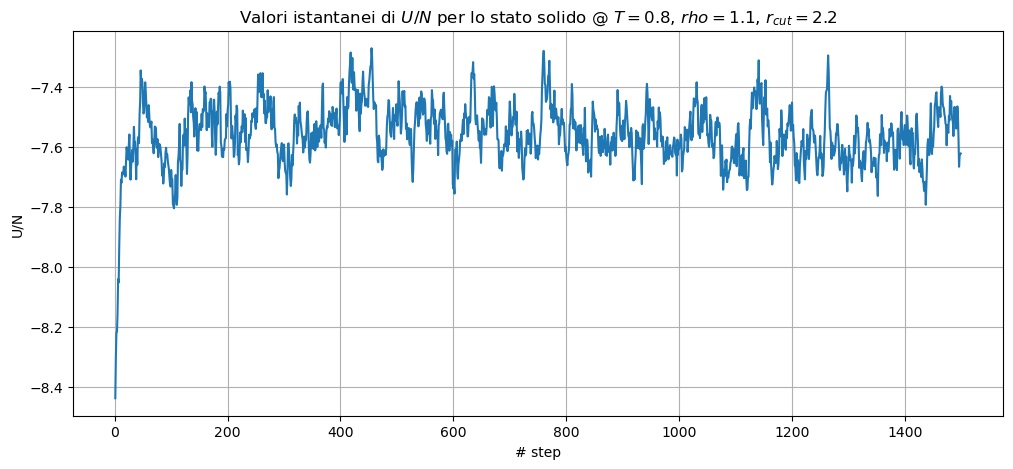

In [4]:
filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_SOLID_EQUILIBRATION/OUTPUT/potential_energy.txt"
PEN = pd.read_table(filename, delimiter = "\t" , usecols=(1,2) , names = ('Step', 'PE_Instant'),header = 0 )
PEN['PE_Instant'] = pd.to_numeric(PEN['PE_Instant'] , errors = 'coerce')
PEN['Step'] = pd.to_numeric(PEN['Step'] , errors = 'coerce')
Step_vector = PEN['PE_Instant']
PE_Current_vector = PEN['PE_Instant']

plt.figure(figsize = (12,5))
plt.plot(PE_Current_vector[1:1500])
plt.title('Valori istantanei di $U/N$ per lo stato solido @ $T = 0.8$, $rho = 1.1$, $r_{cut} = 2.2$')
plt.xlabel('# step')
plt.ylabel('U/N')
plt.grid(True)

In [74]:
## STATO SOLIDO: T = 0.8 rho = 1.1, rcut = 2.2
# Equilibrazione dopo 50 step

#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lettura file
filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_SOLID/OUTPUT/potential_energy.txt"
SOLID = pd.read_table(filename, delimiter = "\t" , usecols=(1,2) , names = ('#','Actual') , header = 0)

#estrarre i dati dalle colonne del file di testo
SOLID['Actual'] = pd.to_numeric(SOLID['Actual'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
energy_vector = SOLID['Actual']

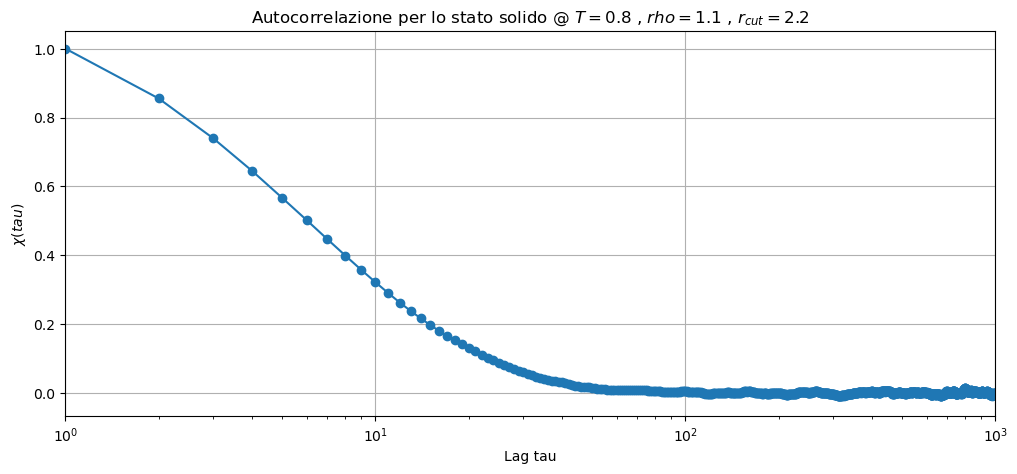

In [78]:
# Calcolo dell'autocorrelazione in funzione del lag
autocorr = autocorrelation_function(energy_vector)
autocorr = translate(autocorr)

lags = np.arange(len(energy_vector))

# Tracciamento dell'autocorrelazione in funzione del lag
plt.figure(figsize = (12,5))
plt.semilogx(np.arange(len(autocorr)), autocorr, marker='o', linestyle='-')
plt.xlabel('Lag tau')
plt.ylabel('$\chi(tau)$')
plt.title('Autocorrelazione per lo stato solido @ $T = 0.8$ , $rho = 1.1$ , $r_{cut} = 2.2$')
plt.xlim(1,1000)
plt.grid(True)
plt.show()

Per lo stato liquido, il tempo caratteristico dell'autocorrelazione è entro $200$ step.

Si studia lo stato gassoso con $T = 1.2$,$\rho = 0.05$, $r_{cut} = 5.0$, valutando per primo il numero di step di equilibrazione:

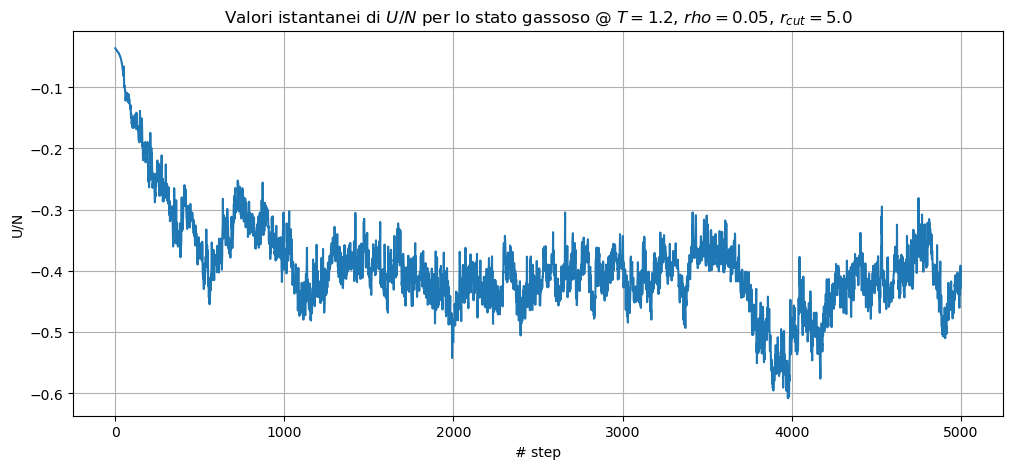

In [56]:
filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_GAS_EQUILIBRATION/OUTPUT/potential_energy.txt"
PEN = pd.read_table(filename, delimiter = "\t" , usecols=(1,2) , names = ('Step', 'PE_Instant'),header = 0 )
PEN['PE_Instant'] = pd.to_numeric(PEN['PE_Instant'] , errors = 'coerce')
PEN['Step'] = pd.to_numeric(PEN['Step'] , errors = 'coerce')
Step_vector = PEN['PE_Instant']
PE_Current_vector = PEN['PE_Instant']

plt.figure(figsize = (12,5))
plt.plot(PE_Current_vector[1:5000])
plt.title('Valori istantanei di $U/N$ per lo stato gassoso @ $T = 1.2$, $rho = 0.05$, $r_{cut} = 5.0$')
plt.xlabel('# step')
plt.ylabel('U/N')
plt.grid(True)

Si decide dunque di fissare il numero di step di equilibrazione a $1500$.

In [1]:
## STATO GASSOSO: T = 1.2 rho = 0.8, rcut = 5.0
# Equilibrazione dopo 500 step

#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lettura file
filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_GAS/OUTPUT/potential_energy.txt"
PE = pd.read_table(filename, delimiter = "\t" , usecols=(1,2) , names = ('#','Actual') , header = 0)

#estrarre i dati dalle colonne del file di testo
PE['Actual'] = pd.to_numeric(PE['Actual'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
energy_vector = PE['Actual']

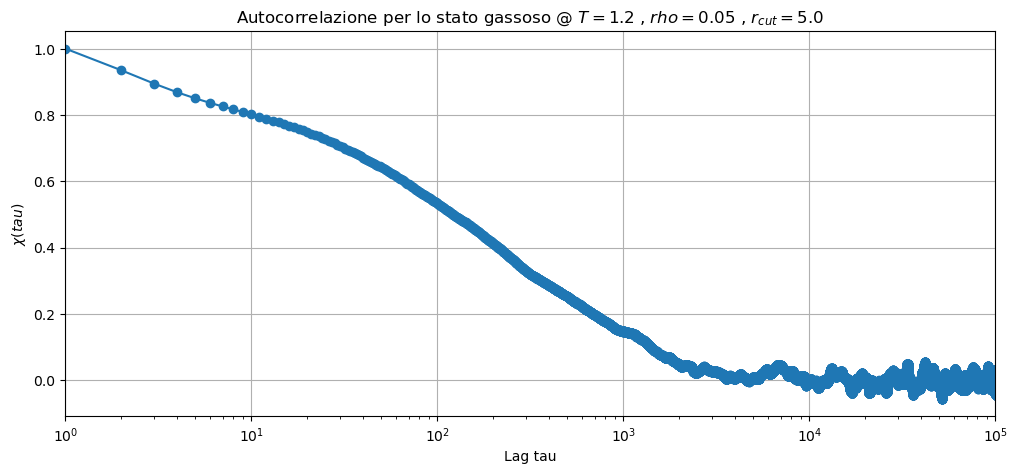

In [58]:
# Calcolo dell'autocorrelazione in funzione del lag
autocorr = autocorrelation_function(energy_vector)
new_autocorr = np.zeros(len(autocorr) + 1)
#traslazione del vettore per la rappresentazione in scala logaritmica
for i in range(0, len(energy_vector)):
    new_autocorr[i+1] = autocorr[i]

# Creazione dell'array dei lags
lags = np.arange(len(energy_vector))

# Tracciamento dell'autocorrelazione in funzione del lag
plt.figure(figsize = (12,5))
plt.semilogx(np.arange(len(new_autocorr)), new_autocorr, marker='o', linestyle='-')
plt.xlabel('Lag tau')
plt.ylabel('$\chi(tau)$')
plt.title('Autocorrelazione per lo stato gassoso @ $T = 1.2$ , $rho = 0.05$ , $r_{cut} = 5.0$')
plt.xlim(1,100000)
plt.grid(True)
plt.show()

Per lo stato gassoso, il tempo caratteristico dell'autocorrelazione è pari a circa 2000 step.

Si procede quindi a ripetere la valutazione dell'andamento della media globale di $< U/N >$, studiando con attenzione come varia l'incertezza ad essa associata al variare del numero di step in ogni blocco. Più precisamente, per ogni dimensione di batch fissata $L = M / N$, con $M$ il numero globale di step, mantenuto costante, e $N$ il numero di blocchi in cui questi ultimi sono suddivisi, si riporta il valore della deviazione standard della media dopo $N$ batch, per ognuno dei tre stati considerati. Per diminuire il costo computazionale si sono fissati $M = 100000$ step di evoluzione per ogni simulazione. 

Per il solido:

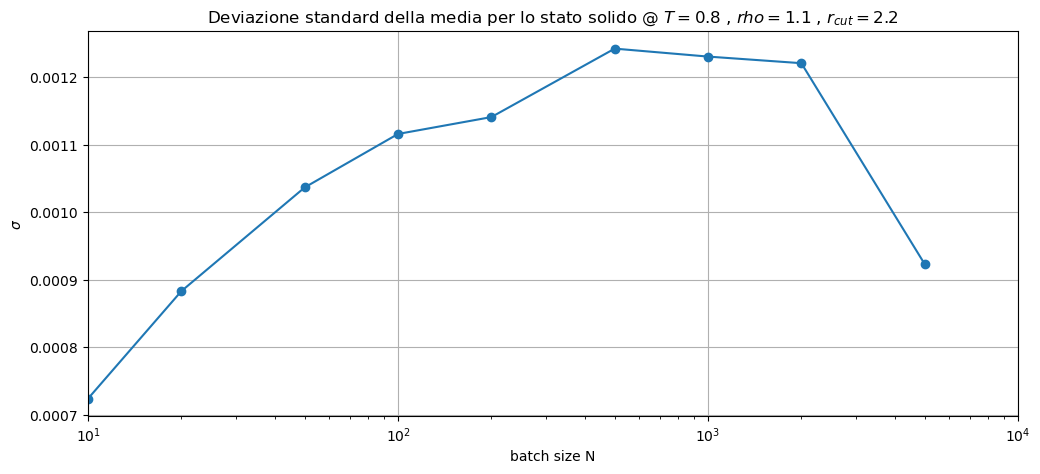

In [84]:
#M = 100000
filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_SOLID_STDEV/OUTPUT/final_measures.txt"

#Lettura file
SOLID = pd.read_table(filename, delimiter = "\t" , usecols=(1,3) , names = ('Size','Stdev'))

#estrarre i dati dalle colonne del file di testo
SOLID['Size'] = pd.to_numeric(SOLID['Size'] , errors = 'coerce')
SOLID['Stdev'] = pd.to_numeric(SOLID['Stdev'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Size_vector = SOLID['Size']
Stdev_vector = SOLID['Stdev']

# Relazione tra deviazione standard della media e dimensione del bathc
plt.figure(figsize = (12,5))
plt.semilogx(Size_vector, Stdev_vector, marker='o', linestyle='-')
plt.xlabel('batch size L')
plt.ylabel('$\sigma$')
plt.title('Deviazione standard della media per lo stato solido @ $T = 0.8$ , $rho = 1.1$ , $r_{cut} = 2.2$')
plt.xlim(10,10000)
plt.grid(True)
plt.show()

Per il liquido:

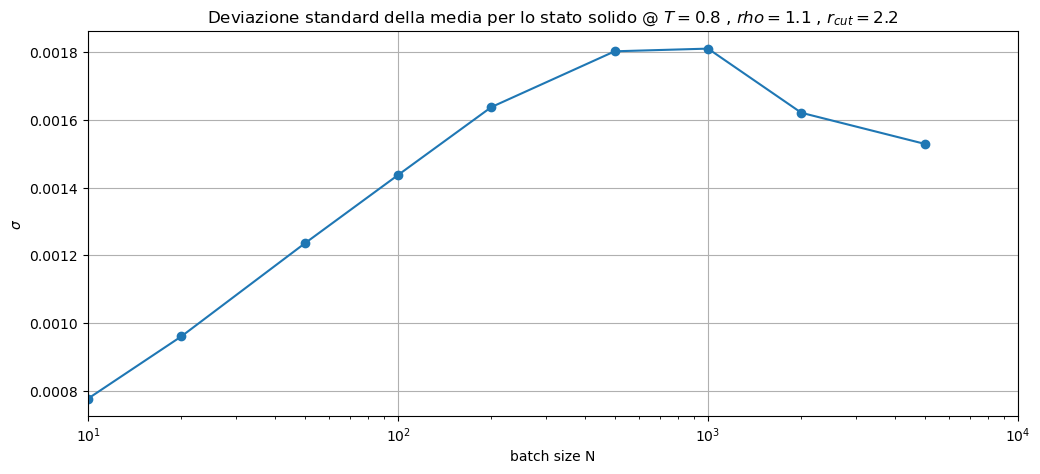

In [85]:
#M = 100000
filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_LIQUID_STDEV/OUTPUT/final_measures.txt"

#Lettura file
LIQUID = pd.read_table(filename, delimiter = "\t" , usecols=(1,3) , names = ('Size','Stdev'))

#estrarre i dati dalle colonne del file di testo
LIQUID['Size'] = pd.to_numeric(LIQUID['Size'] , errors = 'coerce')
LIQUID['Stdev'] = pd.to_numeric(LIQUID['Stdev'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Size_vector = LIQUID['Size']
Stdev_vector = LIQUID['Stdev']

# Relazione tra deviazione standard della media e dimensione del bathc
plt.figure(figsize = (12,5))
plt.semilogx(Size_vector, Stdev_vector, marker='o', linestyle='-')
plt.xlabel('batch size L')
plt.ylabel('$\sigma$')
plt.title('Deviazione standard della media per lo stato solido @ $T = 0.8$ , $rho = 1.1$ , $r_{cut} = 2.2$')
plt.xlim(10,10000)
plt.grid(True)
plt.show()

Per il gas:

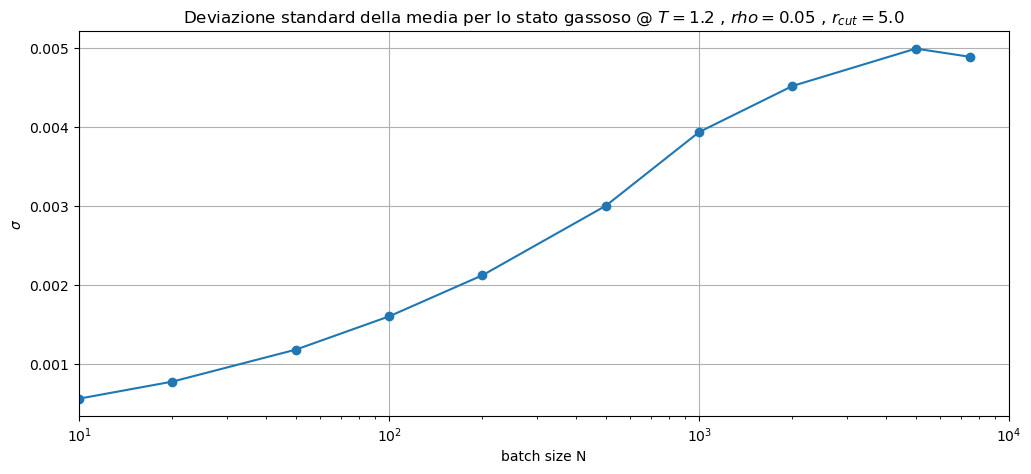

In [65]:
#M = 75000
filename = "Codici_finali/Esercizio_7.2/NSL_SIMULATOR_GAS_STDEV/OUTPUT/final_measures.txt"

#Lettura file
S = pd.read_table(filename, delimiter = "\t" , usecols=(1,3) , names = ('Size','Stdev'))

#estrarre i dati dalle colonne del file di testo
S['Size'] = pd.to_numeric(S['Size'] , errors = 'coerce')
S['Stdev'] = pd.to_numeric(S['Stdev'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Size_vector = S['Size']
Stdev_vector = S['Stdev']

# Relazione tra deviazione standard della media e dimensione del bathc
plt.figure(figsize = (12,5))
plt.semilogx(Size_vector, Stdev_vector, marker='o', linestyle='-')
plt.xlabel('batch size L')
plt.ylabel('$\sigma$')
plt.title('Deviazione standard della media per lo stato gassoso @ $T = 1.2$ , $rho = 0.05$ , $r_{cut} = 5.0$')
plt.xlim(10,10000)
plt.grid(True)
plt.show()

Da tutti e tre i grafici, si evidenzia come, incrementando $L$ fino a circa il doppio del tempo caratteristico dell'autocorrelazione, la deviazione standard della media incrementi. Questo è dovuto al fatto che il numero complessivo di blocchi $N$ diminuisce progressivamente se si mantiene fissato $M$. Infatti, la deviazione standard della media presenta nella sua definizione la divisione per $\sqrt{N}$. Tuttavia, quando $L$ raggiunge il periodo dell'autocorrelazione, si osserva una saturazione della crescita dell'incertezza. Questo comportamento può essere giustificato da una diminuzione degli scarti quadrati $\sqrt{<X^2> - <X>^2}$, che entra il competizione con la diminuzione di $N$. Tale fenomeno è causato dall'incremento della dimensione del singolo blocco, che porta la media in fase $<X>$ ad essere valutata su un numero di configurazioni temporali sufficienti a descrivere correttamente il micro-stato di quasi-equilibrio, eliminando le correlazioni tra punti. 

**Esercizio 7.3-7.4:** Calcolare la funzione di distribuzione radiale $g(r)$. Tale grandezza quantifica la densità di probabilità $P_2(r)$ di trovare una coppia di particelle ad una data distanza $r$, normalizzata rispetto alla densità media $\rho_0 = N/V$ del sistema. Il significato fisico della $g(r)$ risiede nel valutare le correlazioni spaziali tra particelle permettendo di indagare la struttura della fase presa in esame. Una $g(r)$ pari a 1 indica che, a tale distanza, non ci sono correlazioni tra coppie di particelle, dal momento che la densità locale di particelle tende a $\rho_0$.

In concreto, a partire da una configurazione temporale istantanea, in cui è nota la posizione di ogni singola particella tra le $N_0$ complessive, la $g(r)$ è calcolata per intervalli radiali discreti con ampiezza finita. Più precisamente, si considera il range radiale centrato nel box di lato unitario, suddividendolo in $100$ intervalli, che avranno di conseguenza ampiezza $ \Delta r = 0.005$. Per ogni $r = k * \Delta r$ (con $k$ in $[0, 99]$), si calcola quindi la $g(r)$ di ogni bin conteggiando il numero di coppie $N_2(r)$ di particelle che cadono nella calotta sferica corrispondente a tale bin di raggio $r$:

$$g(r) = \frac{1}{\rho_0 \  V(r)} \frac{N_2(r)}{N_0}$$

con $V(r) = 4 \pi / 3  \ ((r + \Delta r)^3 - (r)^3)$ 

Si parte valutando la $g(r)$ per un ensemble canonico per tutte e tre le fasi: solido, liquido e gassoso. Naturalmente, tutte e tre le simulazioni effettuate per calcolare la $g(r)$ sono state impostate imponendo come dimensione del blocco un numero di $L$ step maggiore del tempo caratteristico per l'autocorrelazione.

Per lo stato solido ($L = 250$):

[]

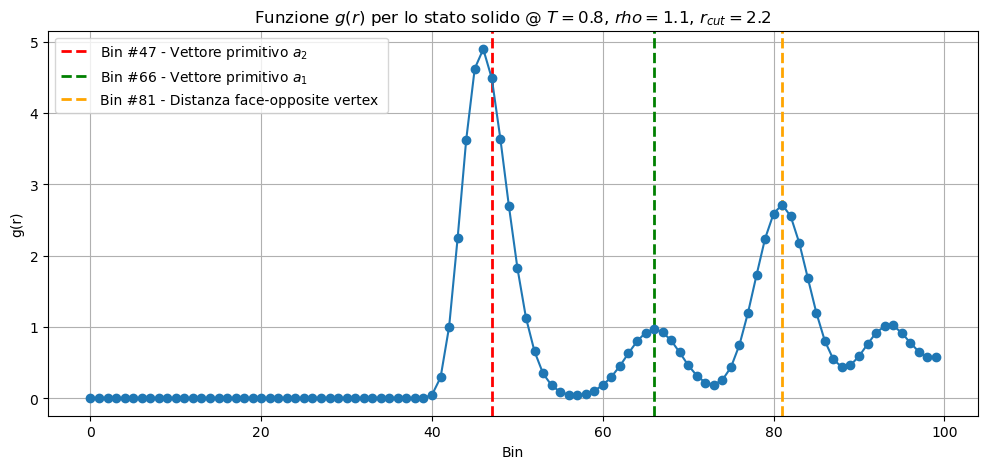

In [11]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STATO SOLIDO
# 40 blocchi da 250 step ciascuno

filename = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_SOLID/OUTPUT/gofr.txt"

#Lettura file
SOLID = pd.read_table(filename, delimiter = "\t" , usecols=(1,3,4) , names = ('Bin','Media','Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
SOLID['Bin'] = pd.to_numeric(SOLID['Bin'] , errors = 'coerce')
SOLID['Media'] = pd.to_numeric(SOLID['Media'] , errors = 'coerce')
SOLID['Stdev_Media'] = pd.to_numeric(SOLID['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Bin_vector = SOLID['Bin']
Media_vector = SOLID['Media']
Stdev_Media_vector = SOLID['Stdev_Media']

plt.figure(figsize = (12,5))
plt.errorbar(Bin_vector , Media_vector, yerr = Stdev_Media_vector, marker = 'o', linestyle = '-')
plt.title('Funzione $g(r)$ per lo stato solido @ $T= 0.8$, $rho = 1.1$, $r_{cut} = 2.2$')
plt.axvline(x=47, color='red', linestyle='--', linewidth=2 , label = 'Bin #47 - Vettore primitivo $a_2$ ')
plt.axvline(x=66, color='green', linestyle='--', linewidth=2 , label = 'Bin #66 - Vettore primitivo $a_1$ ')
plt.axvline(x=81, color='orange', linestyle='--', linewidth=2 , label = 'Bin #81 - Distanza face-opposite vertex ')
plt.xlabel('Bin')
plt.ylabel('g(r)')
plt.legend()
plt.grid()
plt.plot()

Come prima osservazione, è doveroso chiedersi se sia plausibile che la $g(r)$ rimanga pressochè nulla per i primi $40$ bin, corrispondenti ad un raggio, in unità del lato del box, di $0.2$. Per comprenderlo, si individuano le caratteristiche di un cristallo FCC, che è la configurazione del solido qui analizzato. La cella fondamentale di tale reticolo è costituita da 14 atomi (8 sui vertici e 6 sulle facce), ma per contare senza ripetizioni il numero complessivo di particelle in presenza di tante celle adiacenti, si conteggia $1/8$ per gli atomi su ognuno degli $8$ spigoli condivisi con le $7$ celle adiacenti e metà atomo sulle 6 facce condiviso con il cubo adiacente: $1/8 * 8 + 1/2 * 6 = 4$. Inoltre, il reticolo di Bravais può essere campionato come combinazione lineare a coefficienti interi dei seguenti vettori primitivi: $(a_1, a_2, a_3)$:

$a_1 = (1, 0, 0)$ : congiunge due atomi adiacenti sullo spigolo di una cella cubica

$a_2 = (0, \sqrt{2}/2, 0)$ : congiunge un atomo al vertice con uno centrato su una faccia ad esso corrispondente

$a_3 = (0, 0 ,1)$ : congiunge un atomo del vertice con un altro adiacente di uno spigolo su una faccia ortogonale a quella precedente

Sapendo quindi che il sistema, nel suo complesso, è costituito da $108$ particelle disposte attorno ai siti reticolari di un cristallo FCC, la cui cella fondamentale contiene $4$ atomi , si può approssimare l'intera struttura come un cubo costituito da $108/4 = 27$ celle FCC, ovvero $3$ celle lungo ogni singola direzione. Dunque, si può stimare approssimativamente la distanza media tra particelle adiacenti disposte lungo lo spigolo della cella cubica come maggiorata da un terzo del lato unitario, con $r = 1/3$ che corrisponde al $66$-esimo bin, ovvero la posizione del secondo picco. Differentemente, la distanza media tra una molecola di un vertice e una molecola di una faccia ad esso corrispondente è maggiorata da $\sqrt{2}/2 * 1/3 \approx 0.235$. Infatti, $r = 0.235$ corrisponde a circa il $47$-esimo bin, ovvero la posizione del primo picco del grafico. 

Pertanto, è logico ritenere che i picchi mostrati nel grafico siano risonanti con le distanze tra atomi adiacenti in un cristallo FCC, con l'allargamento giustificato dal fatto che i valori della $g(r)$ per ogni bin sono mediati lungo l'evoluzione del sistema, il quale è soggetto a gradi di libertà vibrazionali. Oltre alle distanze tra atomi adiacenti segnalate dai vettori primitivi, bisogna considerare anche tutte le possibili distanze tra particelle non appartenenti alla medesima faccia. Ad esempio, la distanza tra il sito al centro di una faccia e il vertice di una faccia non corrsipondente è maggiorata da $1/3 * \sqrt{0.5 ^ 2 + 0.5 ^ 2 + 1} \approx 0.408$, corrispondente quindi all'$81$-esimo bin, vale a dire il terzo picco del grafico. E' plausibile che anche il quarto picco sia dovuto alla distanza tra atomi non adiacenti.

Inoltre, l'altezza dei vari picchi è giustificata dal numero di coppie di atomi che presentano quella caratteristica distanza. Se il cristallo globale è costituito da $27$ celle FCC per un totale di $108$ atomi, si avranno esattamente $3 x 3 x 3 = 27$ vertici e $108 - 27 = 81$ facce. Pertanto, avendo molte più particelle sulle facce che sui vertici, ne consegue un maggior numero di coppie faccia-vertice rispetto alle coppie vertice-vertice per molecole adiacenti. Di conseguenza, il primo e il terzo picco, risonanti con distanze per coppie che coinvolgono almeno un atomo sulla faccia, saranno considerevolmente più alti del secondo picco.

Si passa ora al caso liquido ($L = 250)$:

[]

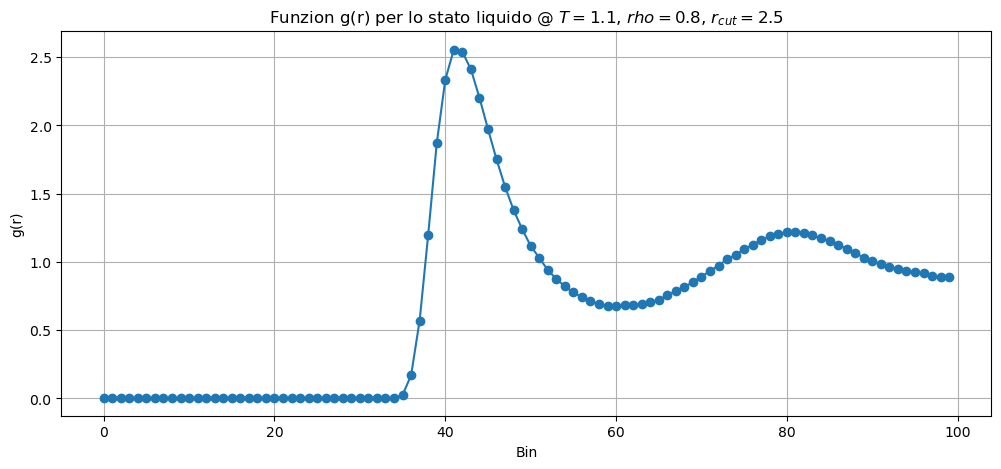

In [16]:
## STATO LIQUIDO
#40 blocchi da 250 step ciascuno

filename = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_LIQUID/OUTPUT/gofr.txt"

#Lettura file
LIQUID = pd.read_table(filename, delimiter = "\t" , usecols=(1,3,4) , names = ('Bin','Media','Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
LIQUID['Bin'] = pd.to_numeric(LIQUID['Bin'] , errors = 'coerce')
LIQUID['Media'] = pd.to_numeric(LIQUID['Media'] , errors = 'coerce')
LIQUID['Stdev_Media'] = pd.to_numeric(LIQUID['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Bin_vector = LIQUID['Bin']
Media_vector = LIQUID['Media']
Stdev_Media_vector = LIQUID['Stdev_Media']

plt.figure(figsize = (12,5))
plt.errorbar(Bin_vector , Media_vector, yerr = Stdev_Media_vector, marker = 'o', linestyle = '-')
plt.title('Funzion g(r) per lo stato liquido @ $T= 1.1$, $rho = 0.8$, $r_{cut} = 2.5$')
plt.xlabel('Bin')
plt.ylabel('g(r)')
plt.grid()
plt.plot()

L'andamento della curva è coerente con gli esempi della letteratura che riguardano un liquido omogeneo e isotropo, con il caratteristico comportamento asintotico a $1$ per $r$ elevati.  

Si studia il caso gassoso ($L = 2500$):

[]

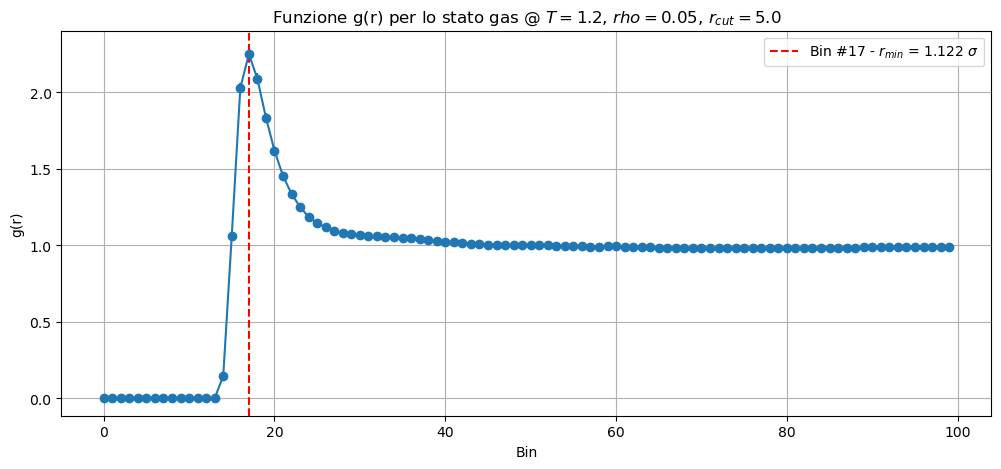

In [10]:
## STATO GASSOSO
# 20 blocchi da 2500 step ciascuno

filename = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_GAS/OUTPUT/gofr.txt"

#Lettura file
GAS = pd.read_table(filename, delimiter = "\t" , usecols=(1,3,4) , names = ('Bin','Media','Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
GAS['Bin'] = pd.to_numeric(GAS['Bin'] , errors = 'coerce')
GAS['Media'] = pd.to_numeric(GAS['Media'] , errors = 'coerce')
GAS['Stdev_Media'] = pd.to_numeric(GAS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Bin_vector = GAS['Bin']
Media_vector = GAS['Media']
Stdev_Media_vector = GAS['Stdev_Media']

plt.figure(figsize = (12,5))
plt.errorbar(Bin_vector , Media_vector, yerr = Stdev_Media_vector, marker = 'o', linestyle = '-')
plt.title('Funzione g(r) per lo stato gas @ $T= 1.2$, $rho = 0.05$, $r_{cut} = 5.0$')
plt.axvline(x = 17, color = 'red', linestyle = '--', label = 'Bin #17 - $r_{min}$ = 1.122 $\sigma$')
plt.xlabel('Bin')
plt.ylabel('g(r)')
plt.legend()
plt.grid()
plt.plot()

Anche per un gas esiste una distanza minima tra particelle, determinata dalla componente repulsiva del potenziale, che è infatti dominante a piccole distanze. Dal modello teorico di Lenard-Jones, tale distanza minima è pari a $r_{min} \approx 1.122 \ \sigma$. Lavorando in unità ridotte in cui $\sigma , \epsilon = 1$, si ha che il box ha un volume pari a $V = N_0 / \rho_0$. Il gas presenta $108$ particelle per $\rho = 0.05$, da cui $V = 2160$. Dunque il lato del box è, in unità ridotte, $L \approx 13$. Dunque, $r_{min} = 1.122$ è circa il $ 17 \%$ dell'halfside del box, ovvero cade nel bin $17$-esimo. Dal grafico, effettivamente la $g(r)$ comincia a crescere soltanto dopo $15 - 16$ bin, confermando quindi il modello teorico LJ per la natura repulsiva del potenziale a breve distanza, con la possibilità delle particelle di avvicinarsi di poco al di sotto di $r_{min}$. 

Successivamente, si riportano i grafici di pressione e energia interna confrontando, per ognuno dei tre stati, l'andamento delle grandezze termodinamiche (in particolare, le loro medie di blocco, le medie globali e la deviazione standard della media), confrontando il caso in cui si sceglie $L = 20$ con il caso in cui si imposta un $L$ sufficientemente grande rispetto al tempo caratteristico dell'autocorrelazione. Il confronto è effettuato fissando $M = 10000$ per solido e liquido e $M = 50000$ per il gas.

Per lo stato solido, si confronta $L = 50$ con $L = 250$:

In [9]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STATO SOLIDO: confronto tra grandezze con L piccolo e L grande
# 200 blocchi da 50 step ciascuno
filename_p = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_SOLID_SMALL_BLOCKS/OUTPUT/pressure.txt"
filename_e = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_SOLID_SMALL_BLOCKS/OUTPUT/potential_energy.txt"

#Lettura file
P = pd.read_table(filename_p, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'P_Current','P_Media','P_Stdev_Media'), header = 0)
E = pd.read_table(filename_e, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'E_Current','E_Media','E_Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
P['Blk'] = pd.to_numeric(P['Blk'] , errors = 'coerce')
P['P_Current'] = pd.to_numeric(P['P_Current'] , errors = 'coerce')
P['P_Media'] = pd.to_numeric(P['P_Media'] , errors = 'coerce')
P['P_Stdev_Media'] = pd.to_numeric(P['P_Stdev_Media'] , errors = 'coerce')

E['E_Current'] = pd.to_numeric(E['E_Current'] , errors = 'coerce')
E['E_Media'] = pd.to_numeric(E['E_Media'] , errors = 'coerce')
E['E_Stdev_Media'] = pd.to_numeric(E['E_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Block_vector_SB = P['Blk']
P_Current_vector_SB = P['P_Current']
P_Media_vector_SB = P['P_Media']
P_Stdev_Media_vector_SB = P['P_Stdev_Media']

E_Current_vector_SB = E['E_Current']
E_Media_vector_SB = E['E_Media']
E_Stdev_Media_vector_SB = E['E_Stdev_Media']

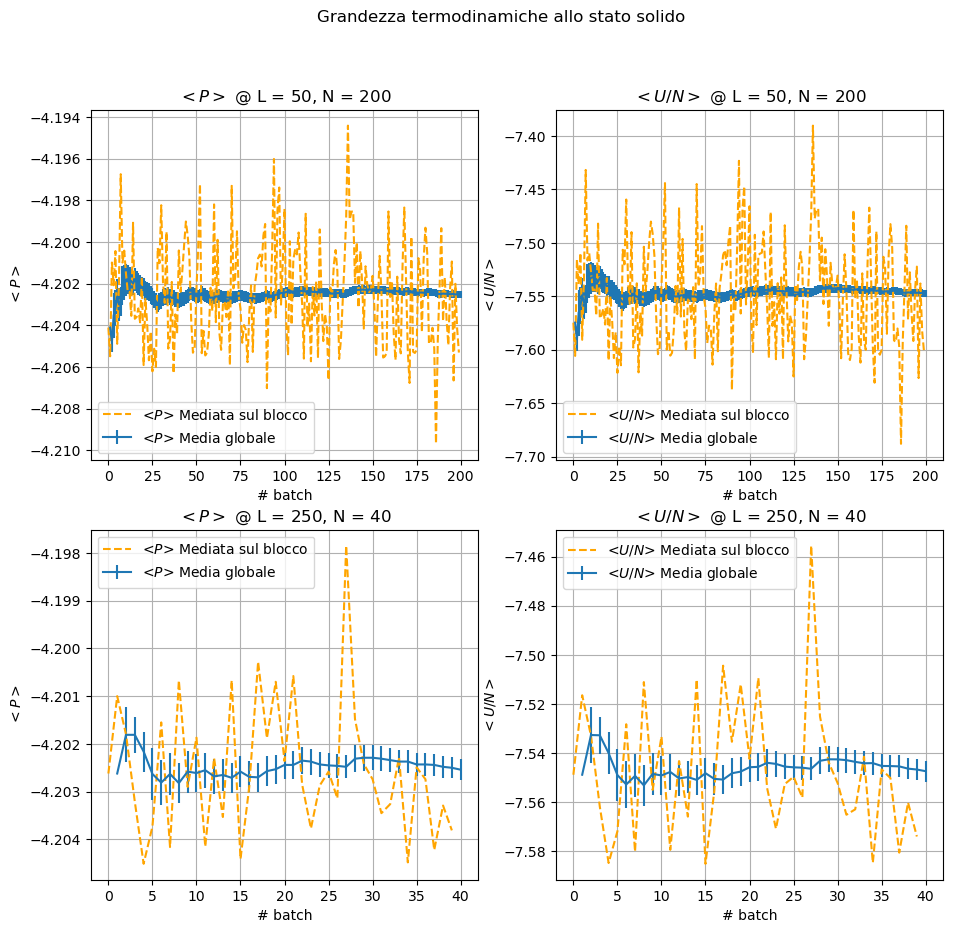

In [10]:
# 40 blocchi da 250 step ciascuno

filename_p = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_SOLID/OUTPUT/pressure.txt"
filename_e = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_SOLID/OUTPUT/potential_energy.txt"

#Lettura file
P = pd.read_table(filename_p, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'P_Current','P_Media','P_Stdev_Media'), header = 0)
E = pd.read_table(filename_e, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'E_Current','E_Media','E_Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
P['Blk'] = pd.to_numeric(P['Blk'] , errors = 'coerce')
P['P_Current'] = pd.to_numeric(P['P_Current'] , errors = 'coerce')
P['P_Media'] = pd.to_numeric(P['P_Media'] , errors = 'coerce')
P['P_Stdev_Media'] = pd.to_numeric(P['P_Stdev_Media'] , errors = 'coerce')

E['E_Current'] = pd.to_numeric(E['E_Current'] , errors = 'coerce')
E['E_Media'] = pd.to_numeric(E['E_Media'] , errors = 'coerce')
E['E_Stdev_Media'] = pd.to_numeric(E['E_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Block_vector = P['Blk']
P_Current_vector = P['P_Current']
P_Media_vector = P['P_Media']
P_Stdev_Media_vector = P['P_Stdev_Media']

E_Current_vector = E['E_Current']
E_Media_vector = E['E_Media']
E_Stdev_Media_vector = E['E_Stdev_Media']

fig, axs = plt.subplots(2,2, figsize = (11,10))
fig.suptitle('Grandezza termodinamiche allo stato solido ')

axs[0,0].errorbar(Block_vector_SB , P_Media_vector_SB, yerr = P_Stdev_Media_vector_SB, label = '<$P$> Media globale')
axs[0,0].set_title('$<P>$ @ L = 50, N = 200')
axs[0,0].plot(P_Current_vector_SB, color = 'orange' , linestyle = '--', label = '<$P$> Mediata sul blocco')
axs[0,0].set_xlabel('# batch')
axs[0,0].set_ylabel('$<P>$')
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].errorbar(Block_vector_SB , E_Media_vector_SB, yerr = E_Stdev_Media_vector_SB, label = '<$U/N$> Media globale')
axs[0,1].set_title('$<U/N>$ @ L = 50, N = 200')
axs[0,1].plot(E_Current_vector_SB, color = 'orange' , linestyle = '--', label = '<$U/N$> Mediata sul blocco')
axs[0,1].set_xlabel('# batch')
axs[0,1].set_ylabel('$<U/N>$')
axs[0,1].legend()
axs[0,1].grid()

axs[1,0].errorbar(Block_vector , P_Media_vector, yerr = P_Stdev_Media_vector, label = '<$P$> Media globale')
axs[1,0].set_title('$<P>$ @ L = 250, N = 40')
axs[1,0].plot(P_Current_vector, color = 'orange' , linestyle = '--', label = '<$P$> Mediata sul blocco')
axs[1,0].set_xlabel('# batch')
axs[1,0].set_ylabel('$<P>$')
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].errorbar(Block_vector , E_Media_vector, yerr = E_Stdev_Media_vector, label = '<$U/N$> Media globale')
axs[1,1].set_title('$<U/N>$ @ L = 250, N = 40')
axs[1,1].plot(E_Current_vector, color = 'orange' , linestyle = '--', label = '<$U/N$> Mediata sul blocco')
axs[1,1].set_xlabel('# batch')
axs[1,1].set_ylabel('$<U/N>$')
axs[1,1].legend()
axs[1,1].grid()

plt.show()

Si osserva immediatamente come la decisione di concentrare un numero di punti $M$ su blocchi più grandi comporti una diminuzione del rapporto tra l'ampiezza delle fluttuazioni della media di blocco $< X >$ e l'ampiezza della corrispondente deviazione standard della media (l'incertezza associata a $< X >$). Complessivamentè, è possibile valutare come anche il valore assoluto di tali oscillazioni diminuisca.

Per lo stato liquido, si confronta $L = 50$ con $L = 250$:

In [12]:
## STATO LIQUIDO: confronto tra grandezze con L piccolo e L grande, M = 10000 const
# 200 blocchi da 50 step ciascuno
filename_p = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_LIQUID_SMALL_BLOCKS/OUTPUT/pressure.txt"
filename_e = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_LIQUID_SMALL_BLOCKS/OUTPUT/potential_energy.txt"

#Lettura file
P = pd.read_table(filename_p, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'P_Current','P_Media','P_Stdev_Media'), header = 0)
E = pd.read_table(filename_e, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'E_Current','E_Media','E_Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
P['Blk'] = pd.to_numeric(P['Blk'] , errors = 'coerce')
P['P_Current'] = pd.to_numeric(P['P_Current'] , errors = 'coerce')
P['P_Media'] = pd.to_numeric(P['P_Media'] , errors = 'coerce')
P['P_Stdev_Media'] = pd.to_numeric(P['P_Stdev_Media'] , errors = 'coerce')

E['E_Current'] = pd.to_numeric(E['E_Current'] , errors = 'coerce')
E['E_Media'] = pd.to_numeric(E['E_Media'] , errors = 'coerce')
E['E_Stdev_Media'] = pd.to_numeric(E['E_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Block_vector_SB = P['Blk']
P_Current_vector_SB = P['P_Current']
P_Media_vector_SB = P['P_Media']
P_Stdev_Media_vector_SB = P['P_Stdev_Media']

E_Current_vector_SB = E['E_Current']
E_Media_vector_SB = E['E_Media']
E_Stdev_Media_vector_SB = E['E_Stdev_Media']

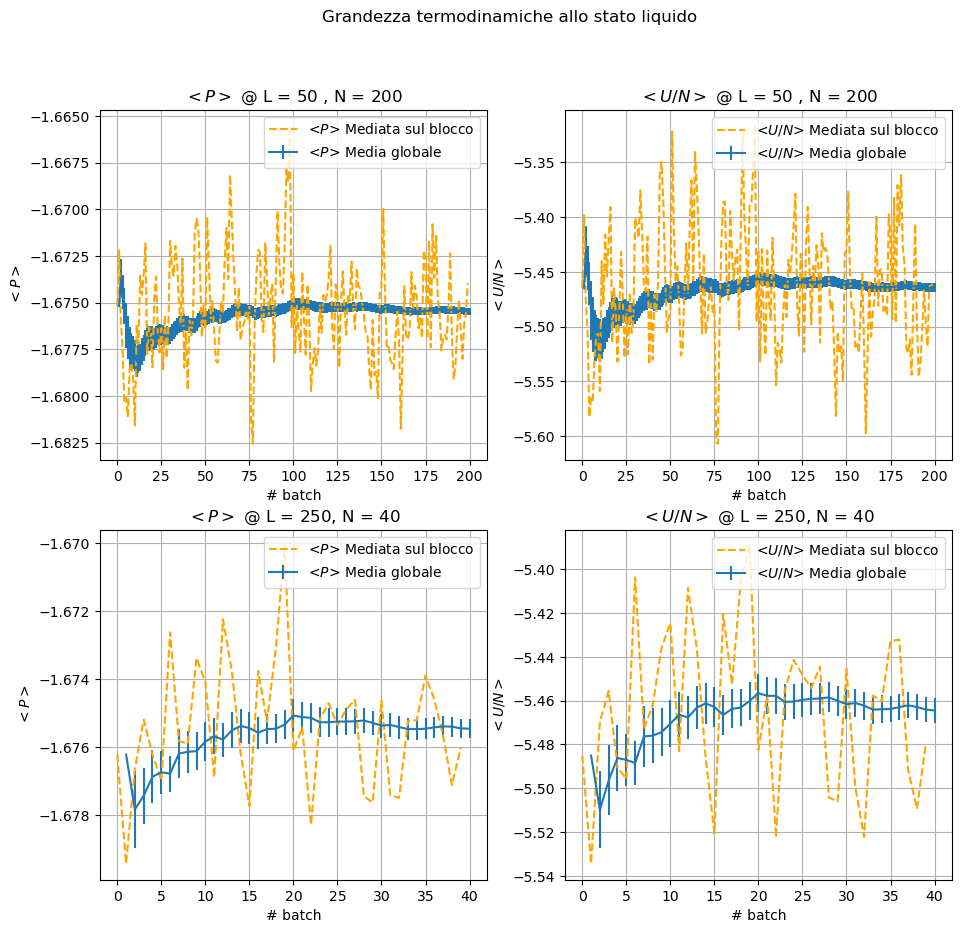

In [14]:
# 40 blocchi da 250 step ciascuno

filename_p = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_LIQUID/OUTPUT/pressure.txt"
filename_e = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_LIQUID/OUTPUT/potential_energy.txt"

#Lettura file
P = pd.read_table(filename_p, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'P_Current','P_Media','P_Stdev_Media'), header = 0)
E = pd.read_table(filename_e, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'E_Current','E_Media','E_Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
P['Blk'] = pd.to_numeric(P['Blk'] , errors = 'coerce')
P['P_Current'] = pd.to_numeric(P['P_Current'] , errors = 'coerce')
P['P_Media'] = pd.to_numeric(P['P_Media'] , errors = 'coerce')
P['P_Stdev_Media'] = pd.to_numeric(P['P_Stdev_Media'] , errors = 'coerce')

E['E_Current'] = pd.to_numeric(E['E_Current'] , errors = 'coerce')
E['E_Media'] = pd.to_numeric(E['E_Media'] , errors = 'coerce')
E['E_Stdev_Media'] = pd.to_numeric(E['E_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Block_vector = P['Blk']
P_Current_vector = P['P_Current']
P_Media_vector = P['P_Media']
P_Stdev_Media_vector = P['P_Stdev_Media']

E_Current_vector = E['E_Current']
E_Media_vector = E['E_Media']
E_Stdev_Media_vector = E['E_Stdev_Media']

fig, axs = plt.subplots(2,2, figsize = (11,10))
fig.suptitle('Grandezza termodinamiche allo stato liquido ')

axs[0,0].errorbar(Block_vector_SB , P_Media_vector_SB, yerr = P_Stdev_Media_vector_SB, label = '<$P$> Media globale')
axs[0,0].set_title('$<P>$ @ L = 50 , N = 200')
axs[0,0].plot(P_Current_vector_SB, color = 'orange' , linestyle = '--', label = '<$P$> Mediata sul blocco')
axs[0,0].set_xlabel('# batch')
axs[0,0].set_ylabel('$<P>$')
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].errorbar(Block_vector_SB , E_Media_vector_SB, yerr = E_Stdev_Media_vector_SB, label = '<$U/N$> Media globale')
axs[0,1].set_title('$<U/N>$ @ L = 50 , N = 200')
axs[0,1].plot(E_Current_vector_SB, color = 'orange' , linestyle = '--', label = '<$U/N$> Mediata sul blocco')
axs[0,1].set_xlabel('# batch')
axs[0,1].set_ylabel('$<U/N>$')
axs[0,1].legend()
axs[0,1].grid()

axs[1,0].errorbar(Block_vector , P_Media_vector, yerr = P_Stdev_Media_vector, label = '<$P$> Media globale')
axs[1,0].set_title('$<P>$ @ L = 250, N = 40')
axs[1,0].plot(P_Current_vector, color = 'orange' , linestyle = '--', label = '<$P$> Mediata sul blocco')
axs[1,0].set_xlabel('# batch')
axs[1,0].set_ylabel('$<P>$')
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].errorbar(Block_vector , E_Media_vector, yerr = E_Stdev_Media_vector, label = '<$U/N$> Media globale')
axs[1,1].set_title('$<U/N>$ @ L = 250, N = 40')
axs[1,1].plot(E_Current_vector, color = 'orange' , linestyle = '--', label = '<$U/N$> Mediata sul blocco')
axs[1,1].set_xlabel('# batch')
axs[1,1].set_ylabel('$<U/N>$')
axs[1,1].legend()
axs[1,1].grid()

plt.show()

Per il gas, si confronta $L = 500$ con $L = 2500$, su $M = 5 * 10^4 $ step complessivi:

In [7]:
## STATO GASSOSO: confronto tra grandezze con L piccolo e L grande
# 100 blocchi da 500 step ciascuno
filename_p = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_GAS_SMALL_BLOCKS/OUTPUT/pressure.txt"
filename_e = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_GAS_SMALL_BLOCKS/OUTPUT/potential_energy.txt"

#Lettura file
P = pd.read_table(filename_p, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'P_Current','P_Media','P_Stdev_Media'), header = 0)
E = pd.read_table(filename_e, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'E_Current','E_Media','E_Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
P['Blk'] = pd.to_numeric(P['Blk'] , errors = 'coerce')
P['P_Current'] = pd.to_numeric(P['P_Current'] , errors = 'coerce')
P['P_Media'] = pd.to_numeric(P['P_Media'] , errors = 'coerce')
P['P_Stdev_Media'] = pd.to_numeric(P['P_Stdev_Media'] , errors = 'coerce')

E['E_Current'] = pd.to_numeric(E['E_Current'] , errors = 'coerce')
E['E_Media'] = pd.to_numeric(E['E_Media'] , errors = 'coerce')
E['E_Stdev_Media'] = pd.to_numeric(E['E_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Block_vector_SB = P['Blk']
P_Current_vector_SB = P['P_Current']
P_Media_vector_SB = P['P_Media']
P_Stdev_Media_vector_SB = P['P_Stdev_Media']

E_Current_vector_SB = E['E_Current']
E_Media_vector_SB = E['E_Media']
E_Stdev_Media_vector_SB = E['E_Stdev_Media']

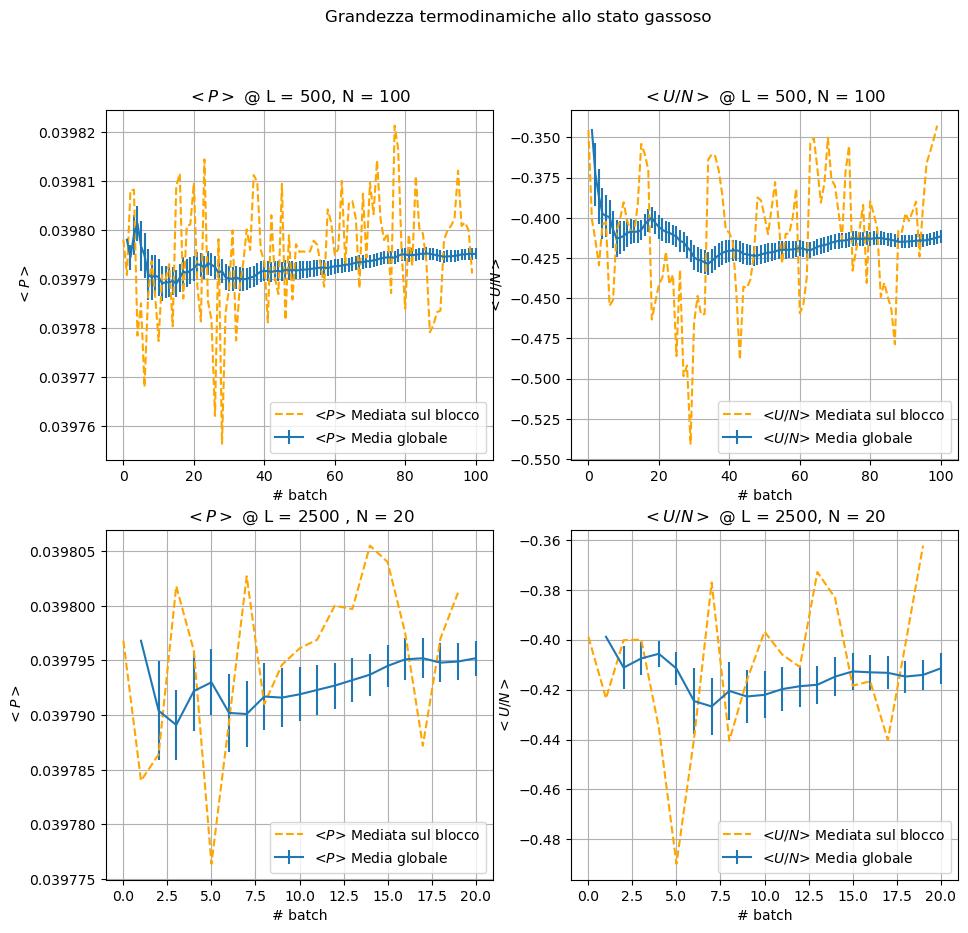

In [8]:
# 20 blocchi da 2500 step ciascuno

filename_p = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_GAS/OUTPUT/pressure.txt"
filename_e = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_GAS/OUTPUT/potential_energy.txt"

#Lettura file
P = pd.read_table(filename_p, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'P_Current','P_Media','P_Stdev_Media'), header = 0)
E = pd.read_table(filename_e, delimiter = "\t" , usecols=(1,2,3,4) , names = ('Blk', 'E_Current','E_Media','E_Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
P['Blk'] = pd.to_numeric(P['Blk'] , errors = 'coerce')
P['P_Current'] = pd.to_numeric(P['P_Current'] , errors = 'coerce')
P['P_Media'] = pd.to_numeric(P['P_Media'] , errors = 'coerce')
P['P_Stdev_Media'] = pd.to_numeric(P['P_Stdev_Media'] , errors = 'coerce')

E['E_Current'] = pd.to_numeric(E['E_Current'] , errors = 'coerce')
E['E_Media'] = pd.to_numeric(E['E_Media'] , errors = 'coerce')
E['E_Stdev_Media'] = pd.to_numeric(E['E_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Block_vector = P['Blk']
P_Current_vector = P['P_Current']
P_Media_vector = P['P_Media']
P_Stdev_Media_vector = P['P_Stdev_Media']

E_Current_vector = E['E_Current']
E_Media_vector = E['E_Media']
E_Stdev_Media_vector = E['E_Stdev_Media']

fig, axs = plt.subplots(2,2, figsize = (11,10))
fig.suptitle('Grandezza termodinamiche allo stato gassoso')

axs[0,0].errorbar(Block_vector_SB , P_Media_vector_SB, yerr = P_Stdev_Media_vector_SB, label = '<$P$> Media globale')
axs[0,0].set_title('$<P>$ @ L = 500, N = 100')
axs[0,0].plot(P_Current_vector_SB, color = 'orange' , linestyle = '--', label = '<$P$> Mediata sul blocco')
axs[0,0].set_xlabel('# batch')
axs[0,0].set_ylabel('$<P>$')
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].errorbar(Block_vector_SB , E_Media_vector_SB, yerr = E_Stdev_Media_vector_SB, label = '<$U/N$> Media globale')
axs[0,1].set_title('$<U/N>$ @ L = 500, N = 100')
axs[0,1].plot(E_Current_vector_SB, color = 'orange' , linestyle = '--', label = '<$U/N$> Mediata sul blocco')
axs[0,1].set_xlabel('# batch')
axs[0,1].set_ylabel('$<U/N>$')
axs[0,1].legend()
axs[0,1].grid()

axs[1,0].errorbar(Block_vector , P_Media_vector, yerr = P_Stdev_Media_vector, label = '<$P$> Media globale')
axs[1,0].set_title('$<P>$ @ L = 2500 , N = 20')
axs[1,0].plot(P_Current_vector, color = 'orange' , linestyle = '--', label = '<$P$> Mediata sul blocco')
axs[1,0].set_xlabel('# batch')
axs[1,0].set_ylabel('$<P>$')
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].errorbar(Block_vector , E_Media_vector, yerr = E_Stdev_Media_vector, label = '<$U/N$> Media globale')
axs[1,1].set_title('$<U/N>$ @ L = 2500, N = 20')
axs[1,1].plot(E_Current_vector, color = 'orange' , linestyle = '--', label = '<$U/N$> Mediata sul blocco')
axs[1,1].set_xlabel('# batch')
axs[1,1].set_ylabel('$<U/N>$')
axs[1,1].legend()
axs[1,1].grid()

plt.show()

Si evidenzia come, nel gas, non ci sia proporzionalità tra pressione ed energia potenziale, a differenza dei casi solido e liquido. Per comprendere questo fenomeno, è necessario riprendere la definizione della pressione:

$$P = \frac{N \ K_B T}{V} - \frac{1}{3V} \sum_i^N_0{(r_i * \nabla_i) U}$$

$$P = \frac{N \ K_B T}{V} - \frac{1}{3V} \sum_i^N_0 (r_i * \nabla_i) U$$

Nei casi di un solido e un liquido, prevale il termine del Viriale, da cui la proporzionalità con l'energia potenziale.
Differentemente, nel caso di un gas, il termine cinetico, dato dalla legge dei gas ideali, prevale sul Viriale, aggiungendo ad ogni istante un termine costante (l'ensemble è canonico: $T = const$), da cui la mancata proporzionalità tra $<P>$ e $<U/N>$.

Infine, si ripete il calcolo della $g(r)$ per un ensemble micro-canonico (ad energia totale fissata: il sistema è semplicemente isolato senza un termostato esterno).
Per il solido:

[]

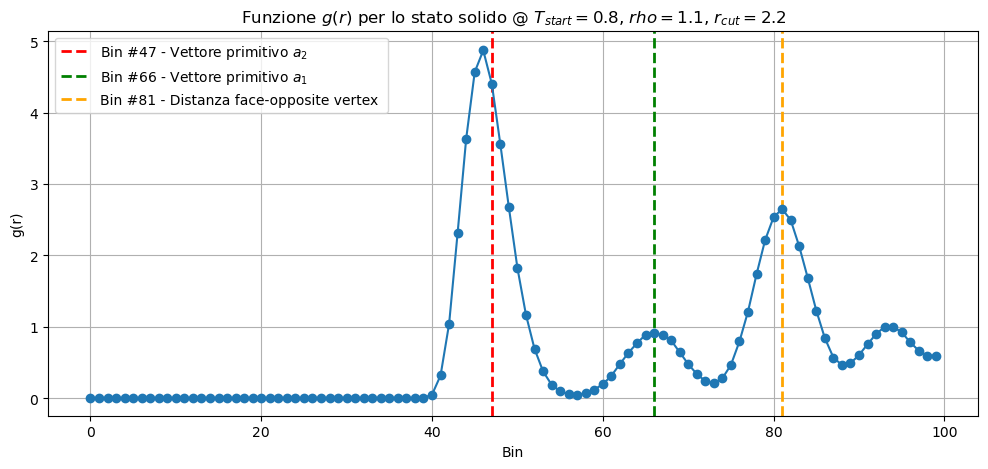

In [1]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STATO SOLIDO
# 40 blocchi da 500 step ciascuno

filename = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_SOLID_MICRO/OUTPUT/gofr.txt"

#Lettura file
SOLID = pd.read_table(filename, delimiter = "\t" , usecols=(1,3,4) , names = ('Bin','Media','Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
SOLID['Bin'] = pd.to_numeric(SOLID['Bin'] , errors = 'coerce')
SOLID['Media'] = pd.to_numeric(SOLID['Media'] , errors = 'coerce')
SOLID['Stdev_Media'] = pd.to_numeric(SOLID['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Bin_vector = SOLID['Bin']
Media_vector = SOLID['Media']
Stdev_Media_vector = SOLID['Stdev_Media']

plt.figure(figsize = (12,5))
plt.errorbar(Bin_vector , Media_vector, yerr = Stdev_Media_vector, marker = 'o', linestyle = '-')
plt.title('Funzione $g(r)$ per lo stato solido @ $T_{start}= 0.8$, $rho = 1.1$, $r_{cut} = 2.2$')
plt.axvline(x=47, color='red', linestyle='--', linewidth=2 , label = 'Bin #47 - Vettore primitivo $a_2$ ')
plt.axvline(x=66, color='green', linestyle='--', linewidth=2 , label = 'Bin #66 - Vettore primitivo $a_1$ ')
plt.axvline(x=81, color='orange', linestyle='--', linewidth=2 , label = 'Bin #81 - Distanza face-opposite vertex ')
plt.xlabel('Bin')
plt.ylabel('g(r)')
plt.legend()
plt.grid()
plt.plot()

Per il liquido:

[]

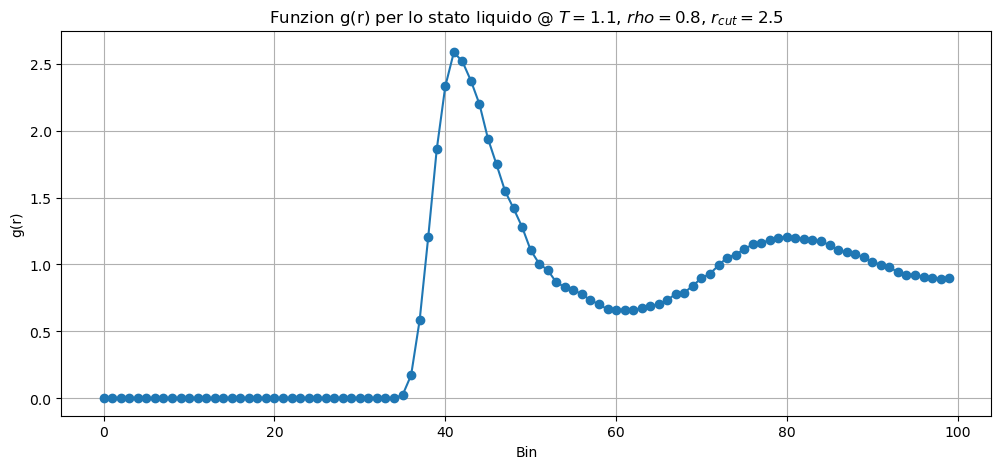

In [4]:
## STATO LIQUIDO
#40 blocchi da 500 step ciascuno

filename = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_LIQUID_MICRO/OUTPUT/gofr.txt"

#Lettura file
LIQUID = pd.read_table(filename, delimiter = "\t" , usecols=(1,3,4) , names = ('Bin','Media','Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
LIQUID['Bin'] = pd.to_numeric(LIQUID['Bin'] , errors = 'coerce')
LIQUID['Media'] = pd.to_numeric(LIQUID['Media'] , errors = 'coerce')
LIQUID['Stdev_Media'] = pd.to_numeric(LIQUID['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Bin_vector = LIQUID['Bin']
Media_vector = LIQUID['Media']
Stdev_Media_vector = LIQUID['Stdev_Media']

plt.figure(figsize = (12,5))
plt.errorbar(Bin_vector , Media_vector, yerr = Stdev_Media_vector, marker = 'o', linestyle = '-')
plt.title('Funzion g(r) per lo stato liquido @ $T= 1.1$, $rho = 0.8$, $r_{cut} = 2.5$')
plt.xlabel('Bin')
plt.ylabel('g(r)')
plt.grid()
plt.plot()

Per il gas:

[]

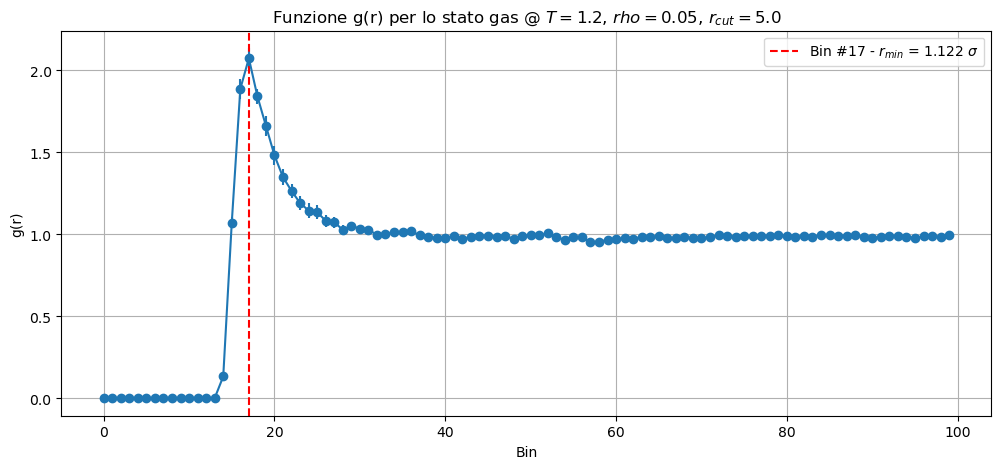

In [5]:
## STATO GASSOSO
# 20 blocchi da 2500 step ciascuno

filename = "Codici_finali/Esercizio_7.4/NSL_SIMULATOR_GAS_MICRO/OUTPUT/gofr.txt"

#Lettura file
GAS = pd.read_table(filename, delimiter = "\t" , usecols=(1,3,4) , names = ('Bin','Media','Stdev_Media'), header = 0)

#estrarre i dati dalle colonne del file di testo
GAS['Bin'] = pd.to_numeric(GAS['Bin'] , errors = 'coerce')
GAS['Media'] = pd.to_numeric(GAS['Media'] , errors = 'coerce')
GAS['Stdev_Media'] = pd.to_numeric(GAS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Bin_vector = GAS['Bin']
Media_vector = GAS['Media']
Stdev_Media_vector = GAS['Stdev_Media']

plt.figure(figsize = (12,5))
plt.errorbar(Bin_vector , Media_vector, yerr = Stdev_Media_vector, marker = 'o', linestyle = '-')
plt.title('Funzione g(r) per lo stato gas @ $T= 1.2$, $rho = 0.05$, $r_{cut} = 5.0$')
plt.axvline(x = 17, color = 'red', linestyle = '--', label = 'Bin #17 - $r_{min}$ = 1.122 $\sigma$')
plt.xlabel('Bin')
plt.ylabel('g(r)')
plt.legend()
plt.grid()
plt.plot()

Dai grafici della $g(r)$ per l'ensemble micro-canonico si registra una sensibile perturbazione delle curve, che non sono più regolari come quelle mostrate per l'ensemble canonico. La motivazione è che, nel caso a energia fissata, il sistema non ha mai realmente una temperatura costante, questo anche dopo tanti step di equilibrazione. Come conseguenza, la distribuzione delle energie cinetiche delle particelle non è esattamente quella di Maxwell-Boltzmann, da cui una perturbazione delle grandezze termodinamiche derivate dalla meccanica statistica, inclusa la densità.

Come riassunto conclusivo dell'esercitazione, si osserva che ogni grandezza sperimentalmente misurabile deve essere quantificata come media in fase $< X >$ valutata su un tempo sufficientemente esteso da definire uno stato termodinamico. In particolare, è necessario mediare $< X >$ su un numero di punti dello spazio delle fasi (ovvero sulle configurazioni date dai singoli step temporali) sufficiente a campionare ergodicamente una "superficie dell'energia", che di fatto rappresenta uno stato termodinamico di quasi-equilibrio. Si sceglie quindi la dimensione del blocco su cui mediare dello stesso ordine di grandezza del tempo necessario a rimuovere le correlazioni tra i punti.

In conclusione, studiando i grafici della $g(r)$ è possibile risalire alla struttura dello stato della materia preso in esame, identificando i vettori primitivi del reticolo FCC nel caso del solido e validando la posizione del raggio minimo di avvicinamento tra particelle nel caso gassoso.